<a href="https://colab.research.google.com/github/kridtapon/Gann-Trix-Breakout-Strategy/blob/main/Gann_Trix_Breakout_Strategy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install vectorbt

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 527.6/527.6 kB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.7/295.7 kB 10.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.4/119.4 kB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 37.2 MB/s eta 0:00:00


In [ ]:
pip install --upgrade yfinance

In [ ]:
import numpy as np
import pandas as pd
import yfinance as yf
import vectorbt as vbt

# Function to calculate Trix Indicator (Triple Exponential Moving Average)
def calculate_trix(df, period=14):
    """
    Calculate the Trix (Triple Exponential Moving Average).
    """
    ema1 = df['Close'].ewm(span=period).mean()
    ema2 = ema1.ewm(span=period).mean()
    ema3 = ema2.ewm(span=period).mean()
    trix = (ema3 - ema3.shift(1)) / ema3.shift(1) * 100  # Percentage change
    return trix

# Function to calculate Gann Fan levels (simulated as key support/resistance)
def calculate_gann_levels(df, period=50):
    """
    Calculate Gann Fan levels based on recent price highs/lows.
    We'll simulate Gann Fan using recent highs/lows as resistance/support.
    """
    # Using highest high and lowest low in the given period for resistance and support levels
    high_level = df['High'].rolling(window=period).max()
    low_level = df['Low'].rolling(window=period).min()
    return high_level, low_level

# Define the stock symbol and time period
symbol = 'META'
start_date = '2019-01-01'
end_date = '2025-01-01'

# Download the data
df = yf.download(symbol, start=start_date, end=end_date)
df.columns = ['Close', 'High', 'Low', 'Open', 'Volume']

# Calculate Trix (Triple Exponential Moving Average)
df['Trix'] = calculate_trix(df)

# Calculate Gann Fan levels (Support and Resistance levels)
df['Gann_Resistance'], df['Gann_Support'] = calculate_gann_levels(df)

# Filter data for the test period (2020-2025)
df = df[(df.index.year >= 2020) & (df.index.year <= 2025)]

# Define Entry and Exit signals based on Trix and Gann Fan levels
df['Entry'] = (df['Trix'] > 0) & (df['Close'] > df['Gann_Resistance'].shift(10))  # Buy when Trix crosses above zero and price breaks above resistance
df['Exit'] = (df['Trix'] < 0) | (df['Close'] < df['Gann_Support'].shift(10))  # Sell when Trix crosses below zero or price hits support

# Backtest using vectorbt
portfolio = vbt.Portfolio.from_signals(
    close=df['Close'],
    entries=df['Entry'],
    exits=df['Exit'],
    init_cash=100_000,
    fees=0.001,
    slippage=0.002,
    freq='D'
)

# Display performance metrics
print(portfolio.stats())

# Plot equity curve
portfolio.plot().show()


[*********************100%***********************]  1 of 1 completed


Start                         2020-01-02 00:00:00
End                           2024-12-31 00:00:00
Period                         1258 days 00:00:00
Start Value                              100000.0
End Value                           296441.062441
Total Return [%]                       196.441062
Benchmark Return [%]                   180.172878
Max Gross Exposure [%]                      100.0
Total Fees Paid                       3787.335988
Max Drawdown [%]                        28.500562
Max Drawdown Duration           352 days 00:00:00
Total Trades                                    9
Total Closed Trades                             8
Total Open Trades                               1
Open Trade PnL                       -14994.63973
Win Rate [%]                                 62.5
Best Trade [%]                         105.227874
Worst Trade [%]                         -10.03824
Avg Winning Trade [%]                   34.808908
Avg Losing Trade [%]                    -6.373478


In [ ]:
# Define Entry and Exit signals based on Trix and Gann Fan levels
df['Entry'] = (df['Trix'] > 0) & (df['Gann_Resistance'] > df['Gann_Resistance'].shift(10))  # Buy when Trix crosses above zero and price breaks above resistance
df['Exit'] = (df['Trix'] < 0) | (df['Gann_Resistance'] < df['Gann_Support'].shift(10))  # Sell when Trix crosses below zero or price hits support

# Backtest using vectorbt
portfolio = vbt.Portfolio.from_signals(
    close=df['Close'],
    entries=df['Entry'],
    exits=df['Exit'],
    init_cash=100_000,
    fees=0.001,
    slippage=0.002,
    freq='D'
)

# Display performance metrics
print(portfolio.stats())

# Plot equity curve
portfolio.plot().show()

Start                         2020-01-02 00:00:00
End                           2024-12-31 00:00:00
Period                         1258 days 00:00:00
Start Value                              100000.0
End Value                           322115.803541
Total Return [%]                       222.115804
Benchmark Return [%]                   180.172878
Max Gross Exposure [%]                      100.0
Total Fees Paid                       3901.361053
Max Drawdown [%]                        29.295387
Max Drawdown Duration           352 days 00:00:00
Total Trades                                    9
Total Closed Trades                             8
Total Open Trades                               1
Open Trade PnL                        -16293.3245
Win Rate [%]                                 62.5
Best Trade [%]                         105.227874
Worst Trade [%]                         -10.03824
Avg Winning Trade [%]                   36.679792
Avg Losing Trade [%]                    -6.373478


In [ ]:
import numpy as np
import pandas as pd
import yfinance as yf
import vectorbt as vbt

# Function to calculate Trix Indicator (Triple Exponential Moving Average)
def calculate_trix(df, period=14):
    """
    Calculate the Trix (Triple Exponential Moving Average).
    """
    ema1 = df['Close'].ewm(span=period).mean()
    ema2 = ema1.ewm(span=period).mean()
    ema3 = ema2.ewm(span=period).mean()
    trix = (ema3 - ema3.shift(1)) / ema3.shift(1) * 100  # Percentage change
    return trix

# Function to calculate Gann Fan levels (simulated as key support/resistance)
def calculate_gann_levels(df, period=50):
    """
    Calculate Gann Fan levels based on recent price highs/lows.
    We'll simulate Gann Fan using recent highs/lows as resistance/support.
    """
    # Using highest high and lowest low in the given period for resistance and support levels
    high_level = df['High'].rolling(window=period).max()
    low_level = df['Low'].rolling(window=period).min()
    return high_level, low_level

# Define the stock symbol and time period
symbol = 'META'
start_date = '2019-01-01'
end_date = '2025-01-01'

# Download the data
df = yf.download(symbol, start=start_date, end=end_date)
df.columns = ['Close', 'High', 'Low', 'Open', 'Volume']

# Calculate Trix (Triple Exponential Moving Average)
df['Trix'] = calculate_trix(df)

# Calculate Gann Fan levels (Support and Resistance levels)
df['Gann_Resistance'], df['Gann_Support'] = calculate_gann_levels(df)

# Filter data for the test period (2020-2025)
df = df[(df.index.year >= 2020) & (df.index.year <= 2025)]

# Define Entry and Exit signals based on Trix and Gann Fan levels
df['Entry'] = (df['Trix'] > 0) & (df['Gann_Resistance'] > df['Gann_Resistance'].shift(10))
df['Exit'] = (df['Trix'] < 0) | (df['Gann_Resistance'] < df['Gann_Support'].shift(10))

# Backtest using vectorbt
portfolio = vbt.Portfolio.from_signals(
    close=df['Close'],
    entries=df['Entry'],
    exits=df['Exit'],
    init_cash=100_000,
    fees=0.001,
    slippage=0.002,
    freq='D'
)

# Display performance metrics
print(portfolio.stats())

# Plot equity curve
portfolio.plot().show()

[*********************100%***********************]  1 of 1 completed


Start                         2020-01-02 00:00:00
End                           2024-12-31 00:00:00
Period                         1258 days 00:00:00
Start Value                              100000.0
End Value                           322115.803541
Total Return [%]                       222.115804
Benchmark Return [%]                   180.172878
Max Gross Exposure [%]                      100.0
Total Fees Paid                       3901.361053
Max Drawdown [%]                        29.295387
Max Drawdown Duration           352 days 00:00:00
Total Trades                                    9
Total Closed Trades                             8
Total Open Trades                               1
Open Trade PnL                        -16293.3245
Win Rate [%]                                 62.5
Best Trade [%]                         105.227874
Worst Trade [%]                         -10.03824
Avg Winning Trade [%]                   36.679792
Avg Losing Trade [%]                    -6.373478


[*********************100%***********************]  1 of 1 completed


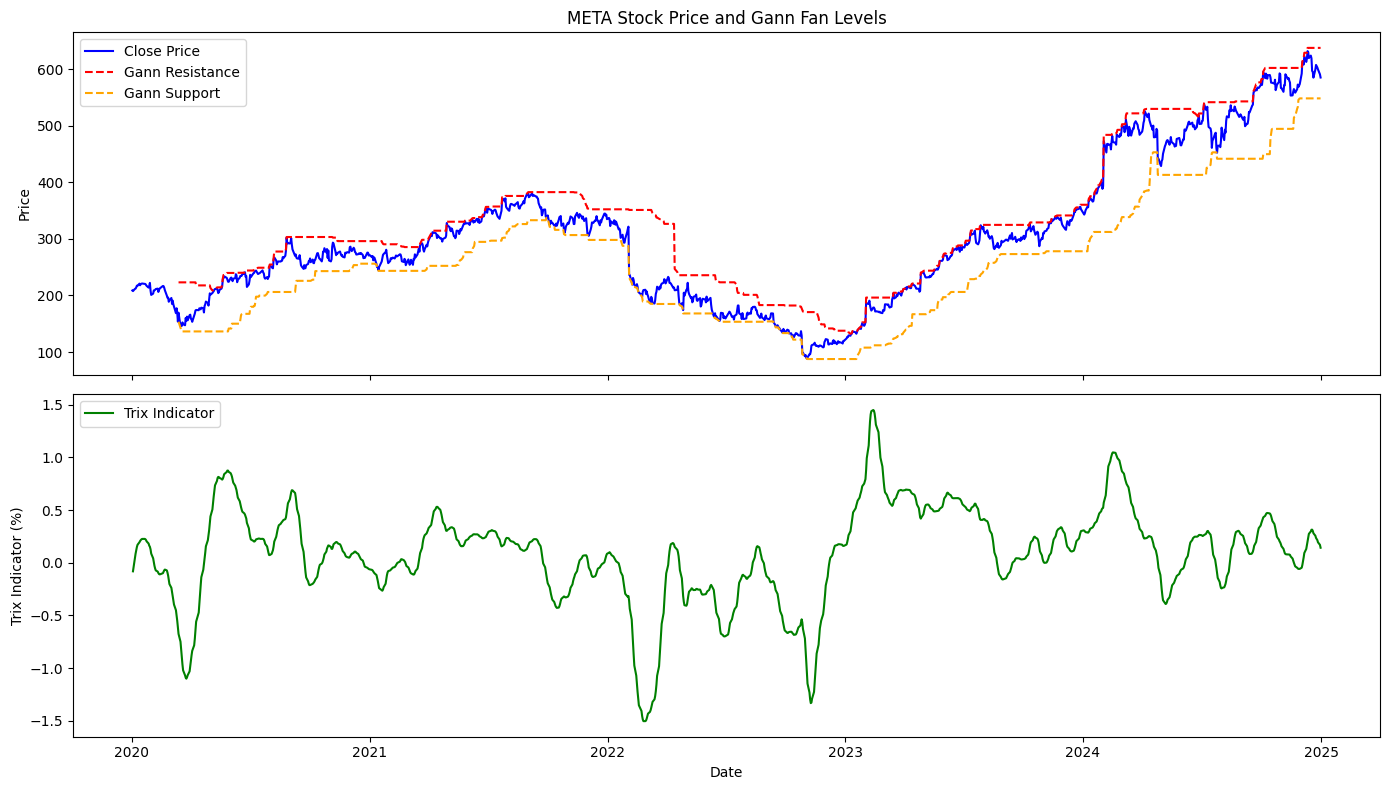

In [ ]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

# Function to calculate Trix Indicator (Triple Exponential Moving Average)
def calculate_trix(df, period=14):
    """
    Calculate the Trix (Triple Exponential Moving Average).
    """
    ema1 = df['Close'].ewm(span=period).mean()
    ema2 = ema1.ewm(span=period).mean()
    ema3 = ema2.ewm(span=period).mean()
    trix = (ema3 - ema3.shift(1)) / ema3.shift(1) * 100  # Percentage change
    return trix

# Function to calculate Gann Fan levels (simulated as key support/resistance)
def calculate_gann_levels(df, period=50):
    """
    Calculate Gann Fan levels based on recent price highs/lows.
    We'll simulate Gann Fan using recent highs/lows as resistance/support.
    """
    # Using highest high and lowest low in the given period for resistance and support levels
    high_level = df['High'].rolling(window=period).max()
    low_level = df['Low'].rolling(window=period).min()
    return high_level, low_level

# Define the stock symbol and time period
symbol = 'META'
start_date = '2020-01-01'
end_date = '2025-01-01'

# Download the data
df = yf.download(symbol, start=start_date, end=end_date)
df.columns = ['Close', 'High', 'Low', 'Open', 'Volume']

# Calculate Trix (Triple Exponential Moving Average)
df['Trix'] = calculate_trix(df)

# Calculate Gann Fan levels (Support and Resistance levels)
df['Gann_Resistance'], df['Gann_Support'] = calculate_gann_levels(df)

# Create the figure and subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 8), sharex=True)

# Plot the stock's closing price on the first panel
ax1.plot(df['Close'], label='Close Price', color='blue', linewidth=1.5)
ax1.plot(df['Gann_Resistance'], label='Gann Resistance', linestyle='--', color='red')
ax1.plot(df['Gann_Support'], label='Gann Support', linestyle='--', color='orange')

# Labels and title for the first panel
ax1.set_ylabel('Price')
ax1.set_title(f'{symbol} Stock Price and Gann Fan Levels')
ax1.legend(loc='upper left')

# Plot the Trix Indicator on the second panel
ax2.plot(df['Trix'], label='Trix Indicator', color='green', linewidth=1.5)

# Labels for the second panel
ax2.set_ylabel('Trix Indicator (%)')
ax2.set_xlabel('Date')
ax2.legend(loc='upper left')

# Tight layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()
